# Reading and plotting experimental time series data

In [1]:
import microval.experiment as mexp
import matplotlib.pyplot as plt
import numpy as np

In [42]:
import imp
imp.reload(mexp)

<module 'microval.experiment' from '\\\\fe00fs45.de.bosch.com\\nae2rng$\\10_script\\micro-fat-val-framework\\script\\microval\\microval\\experiment.py'>

Parameters to adjust.

In [15]:
# Paths to experimental *.mat files
binaraydata_mat_file_name = r"image_time_series_red.mat"
segmenteddata_mat_file_name = r"foreground_mask.mat"
fatiguedata_mat_file_name = r"fatigue_data_red.mat"
# Scale factor for conversion of image data to physical domain
scale_factor = 0.6
# Interesting segment for plotting
interesting_region = [660,720,118,200]

## Binary data

Get the number of frames for binary data.

In [4]:
bindat = mexp.BinaryData(binaraydata_mat_file_name=binaraydata_mat_file_name, fatiguedata_mat_file_name=fatiguedata_mat_file_name)
num_bindat = bindat.get_num_binary_data()
print("Number of time steps:", num_bindat)

Number of time steps: 3015


Select a timestep.

In [5]:
selected_timestep = num_bindat-1

Plot binary data (as difference image wrt to initial image).

\\fe00fs45.de.bosch.com\nae2rng$\10_script\micro-fat-val-framework\script\microval\microval\__init__.py:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(X,


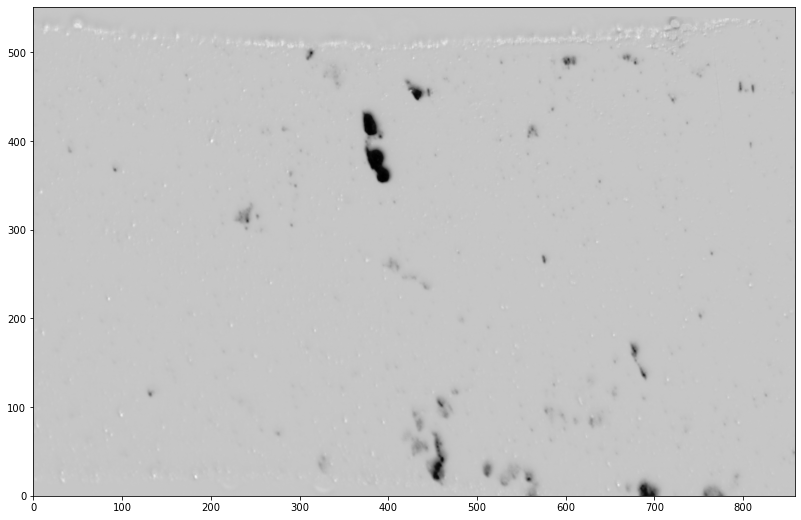

In [6]:
fig=plt.figure(figsize=(16,9))
bindat.imshow(scale_factor = scale_factor, time_step_number = selected_timestep, subtract_initial_state = True) 

Plot binary data in interesting region.

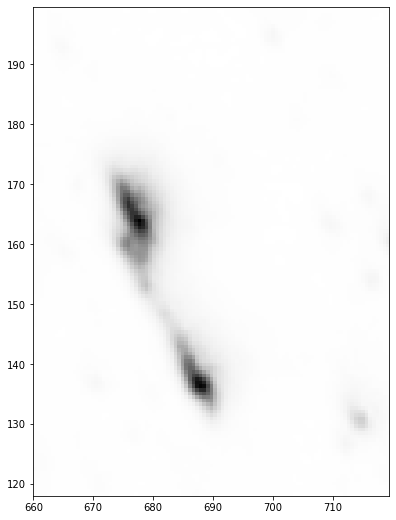

In [7]:
fig=plt.figure(figsize=(16,9))
bindat.imshow(scale_factor = scale_factor, time_step_number = selected_timestep, region = interesting_region) 

Linking frame id's to cycle numbers.

In [8]:
#bindat = mexp.BinaryData(mat_file_name=mat_file_name)
cyclenumbers = bindat.cyclenumbers()

Frame id -> cycle number

In [9]:
print("Number of cycles at frame {}: {:e}".format(selected_timestep,cyclenumbers[selected_timestep]))

Number of cycles at frame 3014: 1.100180e+09


Cycle number -> approx. frame id

In [10]:
def frame_at_cycles(lt):
    fr = np.argmin(np.abs(cyclenumbers-lt))
    return fr

In [11]:
print("Frame at approximately {:e} cycles: {}".format(1e8,frame_at_cycles(1e8)))

Frame at approximately 1.000000e+08 cycles: 1681


## Segmented data

Selecting a frame is not necessary, since segemented data only exists for the last timestep.

Plot segmented data.

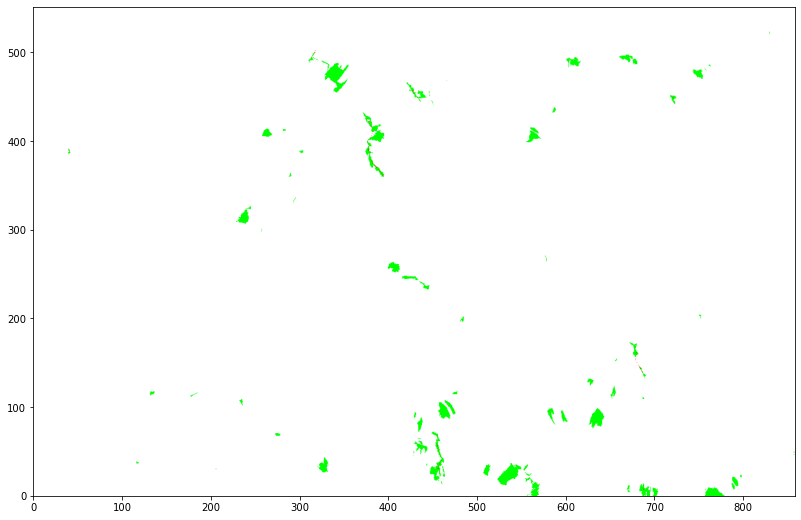

In [43]:
segdat = mexp.SegmentedData(segmenteddata_mat_file_name=segmenteddata_mat_file_name,fatiguedata_mat_file_name=fatiguedata_mat_file_name)
fig=plt.figure(figsize=(16,9))
segdat.imshow(scale_factor = scale_factor, invert_blackwhite = True)

Plot segmented data in interesting region.

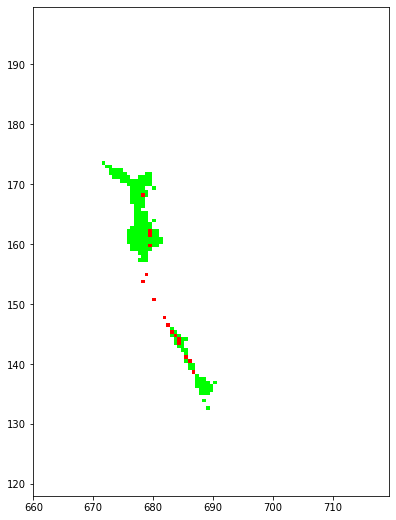

In [44]:
fig=plt.figure(figsize=(16,9))
segdat.imshow(scale_factor = scale_factor, invert_blackwhite = True, region = interesting_region)